# capstone

member team:
- M496B4KX3452 – Nurul Najwa Sabilla – Pelita Bangsa University - Machine Learning - [Active]
- M229B4KY1496 – Ferry Amaludin – Jenderal Soedirman University - Machine Learning - [Active]
- M262B4KY4306 – Tedy Hermawanto - Muhammadiyah University Prof. Dr. Hamka - Machine Learning - [Active]
- C262B4KY2904 – Muhammad Ilham Abdul Mufid – Muhammadiyah University Prof. Dr. Hamka - Cloud Computing - [Active]
- C262B4KY4532 – Yoga Budi Santoso  - Muhammadiyah University Prof. Dr. Hamka - Cloud Computing - [Active]
- A262B4KY3118 – Muhammad Yusuf – Muhammadiyah University Prof. Dr. Hamka - Mobile Developer - [Active]


## 1. Background

Skin diseases affect millions of people worldwide, but early detection remains a challenge due to a lack of access to skilled dermatologists. Misdiagnosis or delayed diagnosis can lead to severe consequences for patients.  

This project addresses the problem by building a deep learning-based model that detects and classifies skin diseases using images. The solution is fast, efficient, and accessible, making it a valuable tool for healthcare.  

### Dataset

This project's capstone uses data on cancer cases that may be found on the ISIC (International Skin Imaging Collaboration) website [In this link](https://www.isic-archive.com/)

# **2. Import Libarary**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from glob import glob
import seaborn as sns

from PIL import Image
np.random.seed(123)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import shutil
import itertools

from numpy.random import seed
seed(101)
import tensorflow as tf
tf.compat.v1.set_random_seed(101)

import pandas as pd
import numpy as np
import keras
from keras import backend as K
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Setup**

In [3]:
pip install isic-cli

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
!isic metadata download --collections 65 > metadata_saved.csv

If you have been granted special permissions, logging in with `isic user login` might return more data.



## **4. Data Loading**

In [5]:
try:
    df = pd.read_csv('metadata_saved.csv')
    print(df.head())
except FileNotFoundError:
    print("Error: metadata_saved.csv not found. Please check the file path or the isic command.")
except pd.errors.EmptyDataError:
    print("Error: metadata_saved.csv is empty. Please check the isic command.")
except pd.errors.ParserError:
    print("Error: Could not parse metadata_saved.csv. Check file format")

        isic_id                   attribution copyright_license  age_approx  \
0  ISIC_0073254  Hospital Clínic de Barcelona          CC-BY-NC        50.0   
1  ISIC_0073251  Hospital Clínic de Barcelona          CC-BY-NC        55.0   
2  ISIC_0073249  Hospital Clínic de Barcelona          CC-BY-NC        70.0   
3  ISIC_0073248  Hospital Clínic de Barcelona          CC-BY-NC        65.0   
4  ISIC_0073247  Hospital Clínic de Barcelona          CC-BY-NC        85.0   

  anatom_site_general benign_malignant  clin_size_long_diam_mm  \
0     upper extremity              NaN                     NaN   
1         palms/soles           benign                     NaN   
2     lower extremity        malignant                     NaN   
3      anterior torso              NaN                     NaN   
4           head/neck              NaN                     NaN   

   concomitant_biopsy dermoscopic_type             diagnosis  ...  \
0                True              NaN  seborrheic keratosi

In [ ]:
atribut = df.columns.values
print(atribut)

['isic_id' 'attribution' 'copyright_license' 'age_approx'
 'anatom_site_general' 'benign_malignant' 'clin_size_long_diam_mm'
 'concomitant_biopsy' 'dermoscopic_type' 'diagnosis' 'diagnosis_1'
 'diagnosis_2' 'diagnosis_3' 'diagnosis_4' 'diagnosis_5'
 'diagnosis_confirm_type' 'family_hx_mm' 'image_type' 'lesion_id'
 'melanocytic' 'nevus_type' 'patient_id' 'personal_hx_mm' 'pixels_x'
 'pixels_y' 'sex']


In [ ]:
df.shape

(25331, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 25331 non-null  object 
 1   attribution             25331 non-null  object 
 2   copyright_license       25331 non-null  object 
 3   age_approx              24849 non-null  float64
 4   anatom_site_general     22700 non-null  object 
 5   benign_malignant        17784 non-null  object 
 6   clin_size_long_diam_mm  556 non-null    float64
 7   concomitant_biopsy      25331 non-null  bool   
 8   dermoscopic_type        1430 non-null   object 
 9   diagnosis               25331 non-null  object 
 10  diagnosis_1             25331 non-null  object 
 11  diagnosis_2             25331 non-null  object 
 12  diagnosis_3             25076 non-null  object 
 13  diagnosis_4             976 non-null    object 
 14  diagnosis_5             414 non-null  

In [ ]:
df.isnull().values.any()

True

#### *Load variabel x*

In [ ]:
print(df['attribution'].value_counts())

attribution
Hospital Clínic de Barcelona                                            12413
ViDIR Group, Department of Dermatology, Medical University of Vienna    10015
Anonymous                                                                2903
Name: count, dtype: int64


In [ ]:
print(df['copyright_license'].value_counts())

copyright_license
CC-BY-NC    22428
CC-0         2903
Name: count, dtype: int64


In [ ]:
print(df['age_approx'].value_counts())

age_approx
45.0    2585
50.0    2489
40.0    2246
55.0    2170
70.0    2120
65.0    2075
60.0    2036
75.0    1796
35.0    1651
80.0    1459
85.0    1319
30.0    1199
25.0     677
20.0     388
15.0     375
10.0     142
5.0      113
0.0        9
Name: count, dtype: int64


In [ ]:
print(df['anatom_site_general'].value_counts())

anatom_site_general
anterior torso     6915
lower extremity    4990
head/neck          4587
upper extremity    2910
posterior torso    2787
palms/soles         398
oral/genital         59
lateral torso        54
Name: count, dtype: int64


In [ ]:
print(df['benign_malignant'].value_counts())

benign_malignant
benign                  13253
malignant                4523
indeterminate               5
indeterminate/benign        3
Name: count, dtype: int64


In [ ]:
print(df['diagnosis'].value_counts())

diagnosis
nevus                         12875
melanoma                       4522
basal cell carcinoma           3323
seborrheic keratosis           1316
pigmented benign keratosis     1099
actinic keratosis               867
squamous cell carcinoma         628
vascular lesion                 253
dermatofibroma                  239
solar lentigo                   209
Name: count, dtype: int64


## **4. Data Cleaning**

#### *Cek Duplicate*

In [ ]:
df.duplicated().sum()

# tidak ada yang duplicate

0

#### *Cek Missing Value*

In [ ]:
df.isnull().sum()

isic_id                       0
attribution                   0
copyright_license             0
age_approx                  482
anatom_site_general        2631
benign_malignant           7547
clin_size_long_diam_mm    24775
concomitant_biopsy            0
dermoscopic_type          23901
diagnosis                     0
diagnosis_1                   0
diagnosis_2                   0
diagnosis_3                 255
diagnosis_4               24355
diagnosis_5               24917
diagnosis_confirm_type     2459
family_hx_mm              24786
image_type                    0
lesion_id                  1667
melanocytic                   0
nevus_type                24750
patient_id                24914
personal_hx_mm            24776
pixels_x                      0
pixels_y                      0
sex                         384
dtype: int64

In [18]:
miss_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
miss_value

isic_id                     0.0 %
attribution                 0.0 %
copyright_license           0.0 %
age_approx                  1.9 %
anatom_site_general       10.39 %
benign_malignant          29.79 %
clin_size_long_diam_mm    97.81 %
concomitant_biopsy          0.0 %
dermoscopic_type          94.35 %
diagnosis                   0.0 %
diagnosis_1                 0.0 %
diagnosis_2                 0.0 %
diagnosis_3                1.01 %
diagnosis_4               96.15 %
diagnosis_5               98.37 %
diagnosis_confirm_type     9.71 %
family_hx_mm              97.85 %
image_type                  0.0 %
lesion_id                  6.58 %
melanocytic                 0.0 %
nevus_type                97.71 %
patient_id                98.35 %
personal_hx_mm            97.81 %
pixels_x                    0.0 %
pixels_y                    0.0 %
sex                        1.52 %
dtype: object

#### **Menangani missing value**
- Dengan drop atribute yang tidak digunakan

In [19]:
# Create a copy of the DataFrame to avoid modifying the original
df_dropped = df.copy()

# Define the columns to keep
columns_to_keep = ['isic_id', 'age_approx', 'anatom_site_general', 'lesion_id', 'diagnosis', 'sex', 'benign_malignant']

df_dropped = df_dropped[columns_to_keep]

print(df_dropped.head())

        isic_id  age_approx anatom_site_general   lesion_id  \
0  ISIC_0073254        50.0     upper extremity  IL_5135481   
1  ISIC_0073251        55.0         palms/soles  IL_2134464   
2  ISIC_0073249        70.0     lower extremity  IL_4888325   
3  ISIC_0073248        65.0      anterior torso  IL_9270243   
4  ISIC_0073247        85.0           head/neck  IL_5031450   

              diagnosis     sex benign_malignant  
0  seborrheic keratosis    male              NaN  
1                 nevus  female           benign  
2              melanoma    male        malignant  
3  seborrheic keratosis    male              NaN  
4  basal cell carcinoma  female              NaN  


In [20]:
df_dropped.isnull().sum()

# Dalam data kesehatan, mengisi (imputasi) nilai yang hilang dengan mean, median, atau modus mungkin tidak selalu tepat karena beberapa alasan seperti tidak Nnrmal atau terdistribusi secara asimetris

isic_id                   0
age_approx              482
anatom_site_general    2631
lesion_id              1667
diagnosis                 0
sex                     384
benign_malignant       7547
dtype: int64

#### *Filtering Data*

In [ ]:
df_filtered = df_dropped.copy()

df_filtered = df_filtered[~df_filtered['diagnosis'].isin(['solar lentigo', 'dermatofibroma', 'vascular lesion '])]
# Simpan df_filtered ke file CSV
df_filtered.to_csv('metadata_filtered.csv', index=False)
print(f"File metadata sudah difilter dan disimpan pada direktori: {os.getcwd()}/metadata_filtered.csv")

print(df_filtered['diagnosis'].value_counts())

File metadata sudah difilter dan disimpan pada direktori: /kaggle/working/metadata_filtered.csv
diagnosis
nevus                         12875
melanoma                       4522
basal cell carcinoma           3323
seborrheic keratosis           1316
pigmented benign keratosis     1099
actinic keratosis               867
squamous cell carcinoma         628
vascular lesion                 253
Name: count, dtype: int64


In [22]:
df_filtered

,isic_id,age_approx,anatom_site_general,lesion_id,diagnosis,sex,benign_malignant
0,ISIC_0073254,50.0,upper extremity,IL_5135481,seborrheic keratosis,male,NaN
1,ISIC_0073251,55.0,palms/soles,IL_2134464,nevus,female,benign
2,ISIC_0073249,70.0,lower extremity,IL_4888325,melanoma,male,malignant
3,ISIC_0073248,65.0,anterior torso,IL_9270243,seborrheic keratosis,male,NaN
4,ISIC_0073247,85.0,head/neck,IL_5031450,basal cell carcinoma,female,NaN
...,...,...,...,...,...,...,...
25326,ISIC_0000004,80.0,posterior torso,NaN,melanoma,male,malignant
25327,ISIC_0000003,30.0,upper extremity,NaN,nevus,male,benign
25328,ISIC_0000002,60.0,upper extremity,NaN,melanoma,female,malignant
25329,ISIC_0000001,30.0,anterior torso,NaN,nevus,female,benign


In [23]:
import pandas as pd

df_filtered = pd.read_csv('metadata_filtered.csv')

diagnosis_counts = df_filtered['diagnosis'].value_counts().to_dict()

diagnosis_list = []
for diagnosis, count in diagnosis_counts.items():
    diagnosis_list.append(f"{diagnosis}: {count}")

print("Daftar Kelas (Diagnosis) dan Jumlah Data:")
for item in diagnosis_list:
    print(item)

Daftar Kelas (Diagnosis) dan Jumlah Data:
nevus: 12875
melanoma: 4522
basal cell carcinoma: 3323
seborrheic keratosis: 1316
pigmented benign keratosis: 1099
actinic keratosis: 867
squamous cell carcinoma: 628
vascular lesion: 253


menghapus vascular lesion

In [ ]:
import pandas as pd

df_filtered = pd.read_csv('metadata_filtered.csv')

df_filtered = df_filtered[df_filtered['diagnosis'] != 'vascular lesion']

df_filtered.to_csv('metadata_filtered.csv', index=False)
print("File CSV telah diperbarui dan 'vascular lesion' telah difilter.")

File CSV telah diperbarui dan 'vascular lesion' telah difilter.


In [25]:
import pandas as pd

df_filtered = pd.read_csv('metadata_filtered.csv')

diagnosis_counts = df_filtered['diagnosis'].value_counts().to_dict()

diagnosis_list = []
for diagnosis, count in diagnosis_counts.items():
    diagnosis_list.append(f"{diagnosis}: {count}")

print("Daftar Kelas (Diagnosis) dan Jumlah Data:")
for item in diagnosis_list:
    print(item)

Daftar Kelas (Diagnosis) dan Jumlah Data:
nevus: 12875
melanoma: 4522
basal cell carcinoma: 3323
seborrheic keratosis: 1316
pigmented benign keratosis: 1099
actinic keratosis: 867
squamous cell carcinoma: 628


Menghapus file csv yang tidak dipakai

In [ ]:
import os

if os.path.exists('metadata_saved.csv'):
    os.remove('metadata_saved.csv')
    print("File 'metadata_saved.csv' berhasil dihapus.")
else:
    print("File 'metadata_saved.csv' tidak ditemukan.")

File 'metadata_saved.csv' berhasil dihapus.


#### *Data CLI*

In [27]:
!isic image download --search "" --collections "65" --limit 0 myimages/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


If you have been granted special permissions, logging in with `isic user login` might return more data.


Successfully downloaded 25,331 images to myimages/.
Successfully wrote 25,331 metadata records to myimages/metadata.csv.
Successfully wrote attributions to myimages/attribution.txt.
Successfully wrote 2 license(s) to myimages/licenses.


Ini bawah gua apus yaa pake yang di bawahnya lagi.

In [ ]:
import pandas as pd
import os
import shutil

def create_category_folders(df_filtered, image_dir, output_dir):
    """
    Creates subfolders within the output directory, categorized by the diagnosis column,
    using only data present in the CSV.

    Args:
        df_filtered: Pandas DataFrame with 'diagnosis' and 'isic_id' columns.
        image_dir: Path to the directory containing images.
        output_dir: Path to the output directory where subfolders will be created.
    """

    os.makedirs(output_dir, exist_ok=True)

    for index, row in df_filtered.iterrows():
        isic_id = row['isic_id']
        diagnosis = row['diagnosis']

        source_image_path = os.path.join(image_dir, f"{isic_id}.jpg")
        destination_folder = os.path.join(output_dir, diagnosis)
        destination_image_path = os.path.join(destination_folder, f"{isic_id}.jpg")

        os.makedirs(destination_folder, exist_ok=True)

        if os.path.exists(source_image_path):
            shutil.copy2(source_image_path, destination_image_path)
        else:
            print(f"Warning: Image {isic_id}.jpg not found in {image_dir}. Skipping...")

image_directory = "myimages"
output_directory = "categorized_images"

create_category_folders(df_filtered, image_directory, output_directory)

#### *Menghapus directory folder myimages*

In [ ]:
import shutil

try:
    shutil.rmtree('myimages')
    print("Directory 'myimages' and its contents removed successfully.")
except FileNotFoundError:
    print("Directory 'myimages' not found.")
except OSError as e:
    print(f"Error deleting directory 'myimages': {e}")

Directory 'myimages' and its contents removed successfully.


#### *Data Visualisasi*

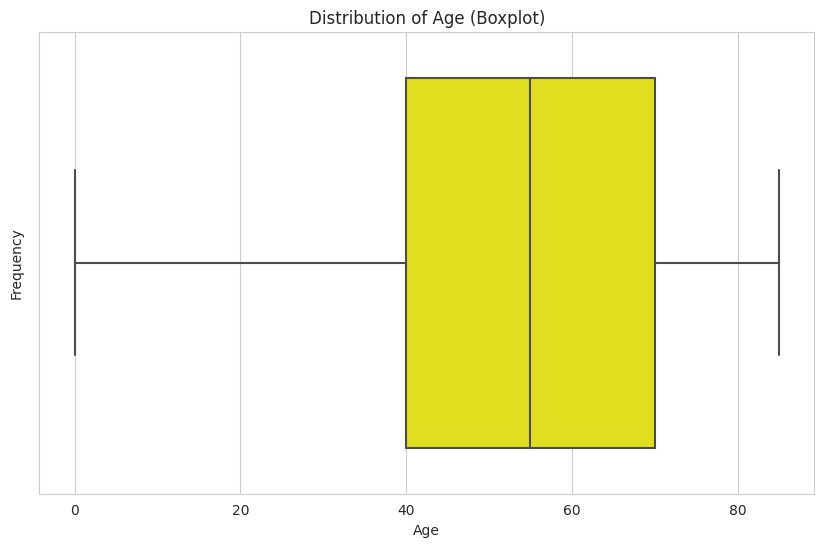

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age_approx'], color='yellow')
plt.title('Distribution of Age (Boxplot)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


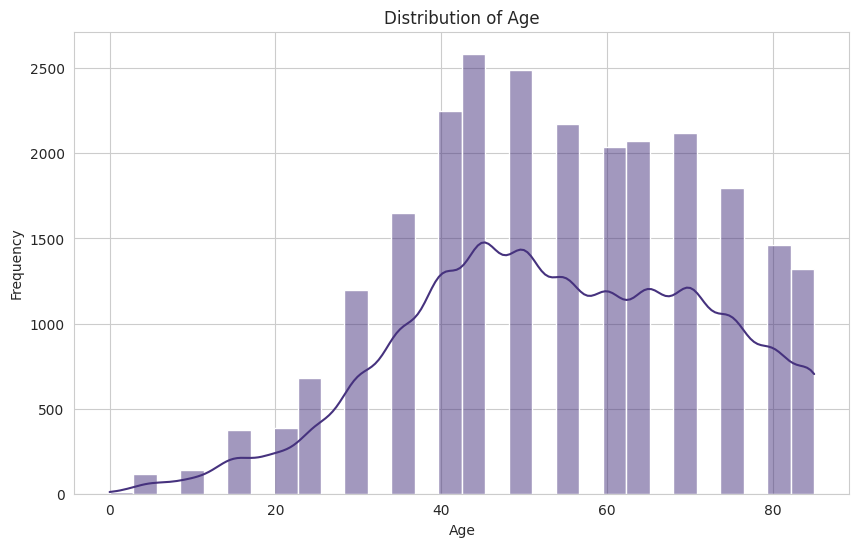

In [ ]:
colors = sns.color_palette('viridis')
plt.figure(figsize=(10, 6))
sns.histplot(df['age_approx'], bins=30, kde=True, color=colors[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [32]:
df_filtered

,isic_id,age_approx,anatom_site_general,lesion_id,diagnosis,sex,benign_malignant
0,ISIC_0073254,50.0,upper extremity,IL_5135481,seborrheic keratosis,male,NaN
1,ISIC_0073251,55.0,palms/soles,IL_2134464,nevus,female,benign
2,ISIC_0073249,70.0,lower extremity,IL_4888325,melanoma,male,malignant
3,ISIC_0073248,65.0,anterior torso,IL_9270243,seborrheic keratosis,male,NaN
4,ISIC_0073247,85.0,head/neck,IL_5031450,basal cell carcinoma,female,NaN
...,...,...,...,...,...,...,...
24625,ISIC_0000004,80.0,posterior torso,NaN,melanoma,male,malignant
24626,ISIC_0000003,30.0,upper extremity,NaN,nevus,male,benign
24627,ISIC_0000002,60.0,upper extremity,NaN,melanoma,female,malignant
24628,ISIC_0000001,30.0,anterior torso,NaN,nevus,female,benign


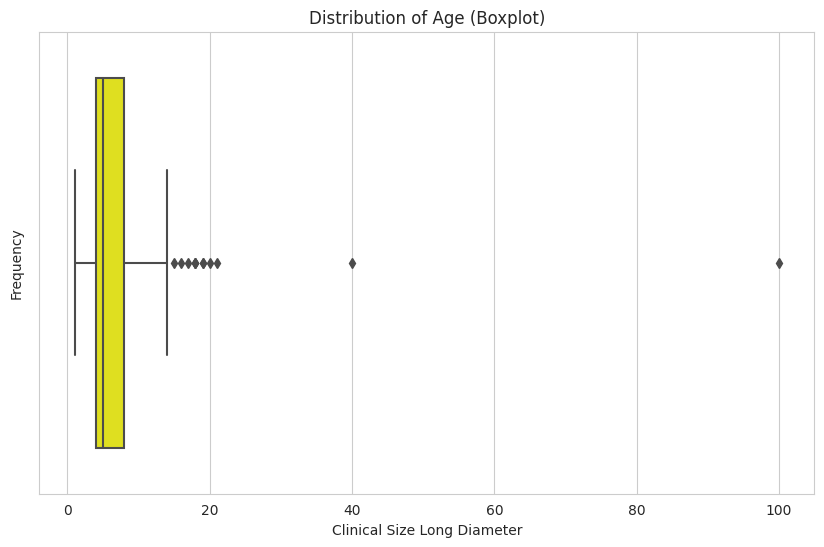

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['clin_size_long_diam_mm'], color='yellow')
plt.title('Distribution of Age (Boxplot)')
plt.xlabel('Clinical Size Long Diameter')
plt.ylabel('Frequency')
plt.show()



---



Melihat direktori saat ini

In [34]:
import os
current_directory = os.getcwd()
print(current_directory)

/kaggle/working


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import pandas as pd

train_dir = './dataset2/train'
val_dir = './dataset2/validation'
image_folder = './categorized_images/'

metadata = pd.read_csv('metadata_filtered.csv')
metadata['isic_id'] = metadata['isic_id'].astype(str) + '.jpg'

metadata.to_csv('metadata_filtered.csv', index=False)

def move_images(data, dest_folder):
    for _, row in data.iterrows():
        image_id = row['isic_id'] 
        label = row['diagnosis']

        label_dir = os.path.join(dest_folder, label)
        os.makedirs(label_dir, exist_ok=True)

        src_path = os.path.join(image_folder, label, image_id) 
        dest_path = os.path.join(label_dir, image_id)

        if os.path.exists(src_path):
            shutil.move(src_path, dest_path)
        else:
            print(f"Warning: Image {image_id} not found in {src_path}. Skipping...")

train_data, val_data = train_test_split(
    metadata,
    test_size=0.2,
    stratify=metadata['diagnosis'],
    random_state=42
)

move_images(train_data, train_dir)
move_images(val_data, val_dir)

print("Proses pemindahan gambar selesai.")

Proses pemindahan gambar selesai.


Lihat penyebaran data

In [ ]:
import os

if not os.path.exists(train_dir):
    print(f"Folder train tidak ditemukan di lokasi: {train_dir}")
else:
    print("Ada di lokasi")
if not os.path.exists(val_dir):
    print(f"Folder validation tidak ditemukan di lokasi: {val_dir}")
else:
    print("Ada di lokasi")

Ada di lokasi
Ada di lokasi


Penyebaran data di train set:
melanoma: 3618 images
squamous cell carcinoma: 502 images
seborrheic keratosis: 1053 images
actinic keratosis: 694 images
nevus: 10300 images
pigmented benign keratosis: 879 images
basal cell carcinoma: 2658 images


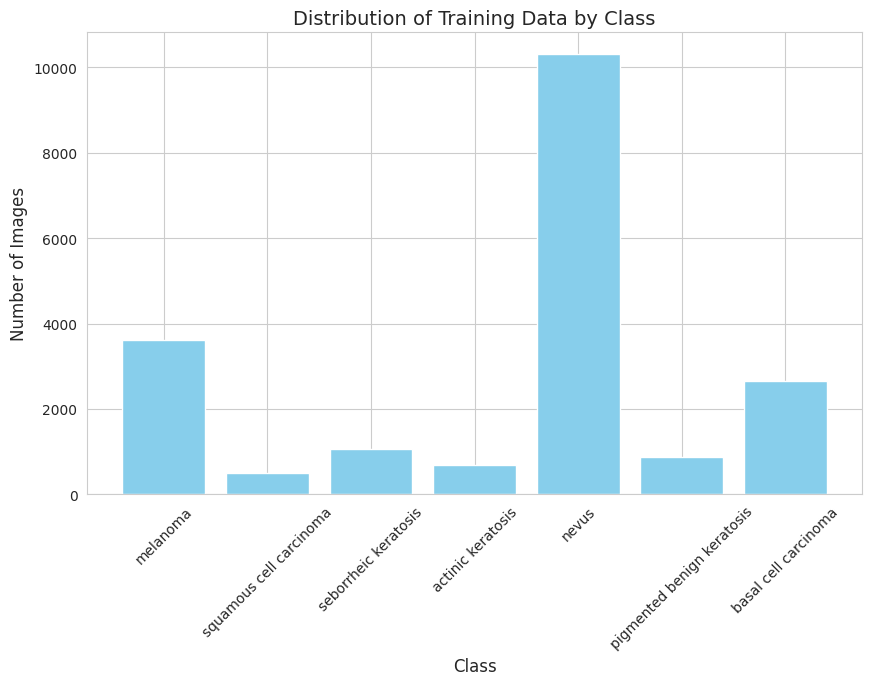

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory): 
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path): 
            num_images = len(os.listdir(class_path)) 
            class_counts[class_name] = num_images
    return class_counts

train_class_counts = count_images_per_class(train_dir)
print("Penyebaran data di train set:")
for label, count in train_class_counts.items():
    print(f"{label}: {count} images")

def plot_distribution(class_counts, title):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Visualisasi penyebaran data
plot_distribution(train_class_counts, "Distribution of Training Data by Class")

In [ ]:
import os

train_dir = './dataset2/train'

labels = os.listdir(train_dir)

print("Urutan data label di file train:")
for i, label in enumerate(labels):
    print(f"{i + 1}. {label}")

Urutan data label di file train:
1. melanoma
2. squamous cell carcinoma
3. seborrheic keratosis
4. actinic keratosis
5. nevus
6. pigmented benign keratosis
7. basal cell carcinoma


Urutan data label di file train:
1. melanoma


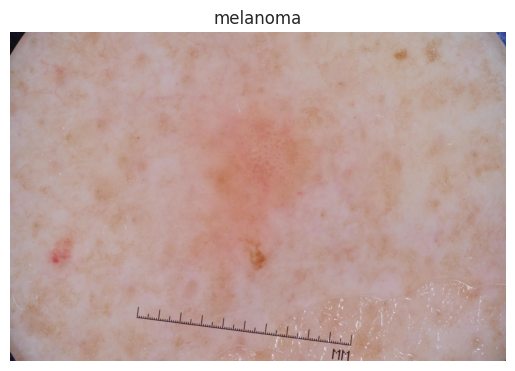

2. squamous cell carcinoma


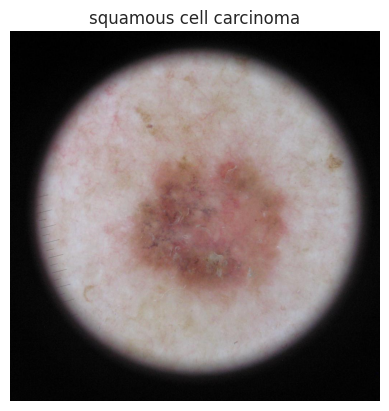

3. seborrheic keratosis


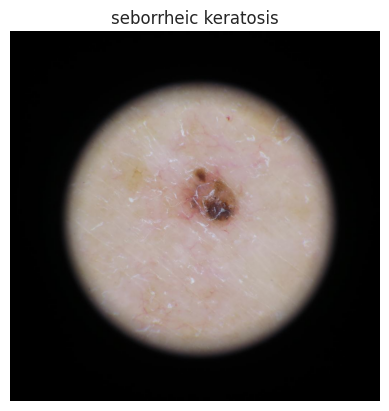

4. actinic keratosis


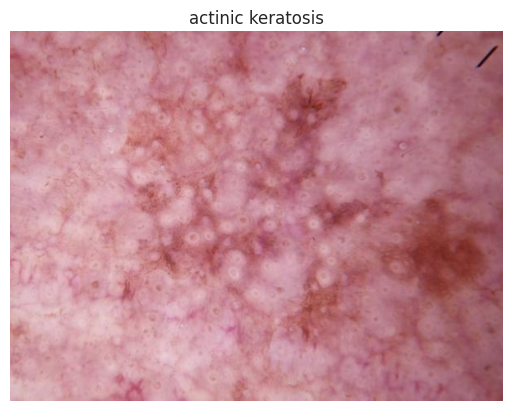

5. nevus


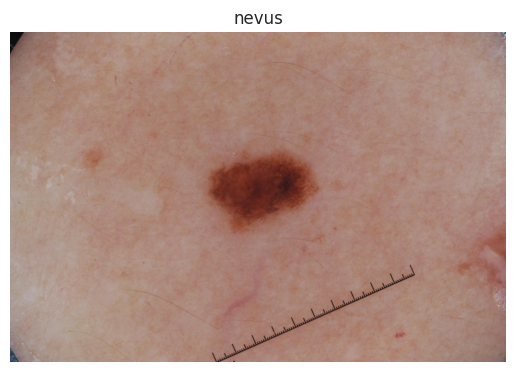

6. pigmented benign keratosis


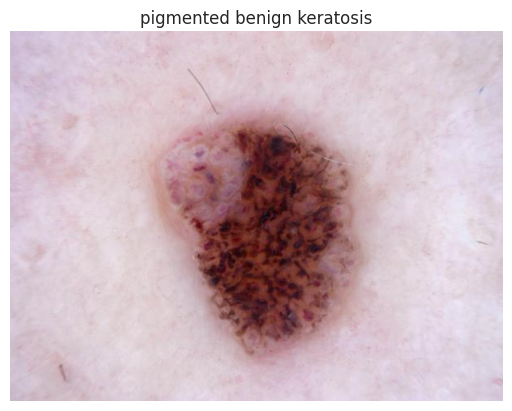

7. basal cell carcinoma


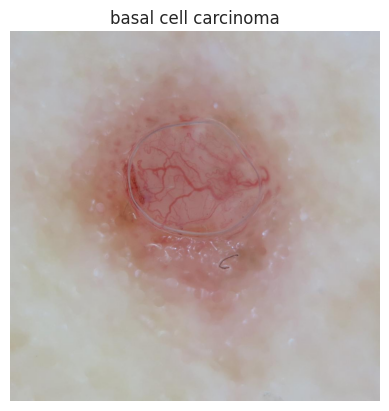

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = './dataset2/train'

labels = os.listdir(train_dir)

print("Urutan data label di file train:")
for i, label in enumerate(labels):
    print(f"{i + 1}. {label}")

    image_path = os.path.join(train_dir, label, os.listdir(os.path.join(train_dir, label))[0]) 

    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

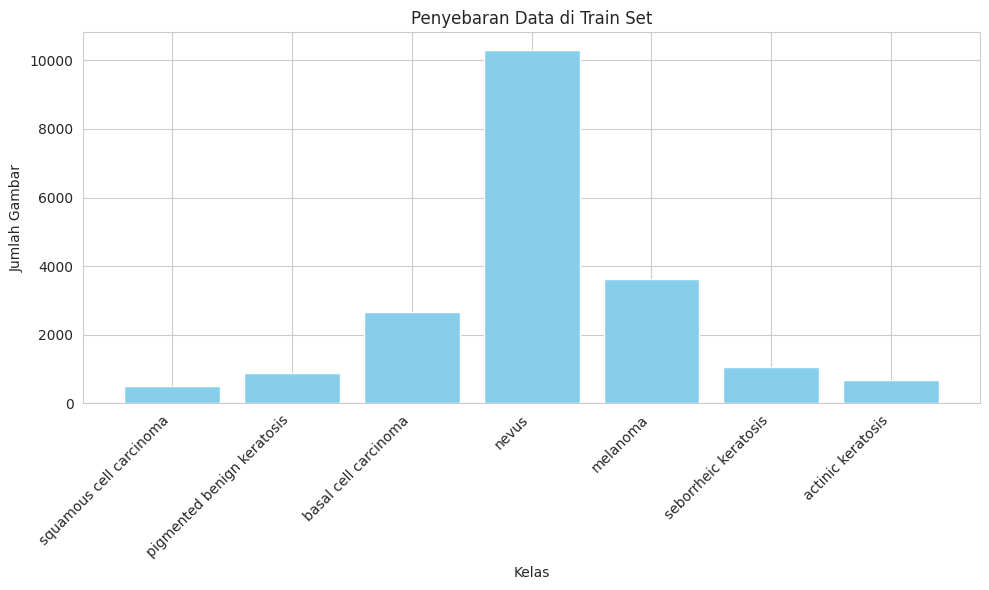

In [ ]:
import matplotlib.pyplot as plt

train_class_counts = {
    'squamous cell carcinoma': 502,
    'pigmented benign keratosis': 879,
    'basal cell carcinoma': 2658,
    'nevus': 10300,
    'melanoma': 3618,
    'seborrheic keratosis': 1053,
    'actinic keratosis': 694,
}

plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Penyebaran Data di Train Set')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.tight_layout()
plt.show()

lebeling

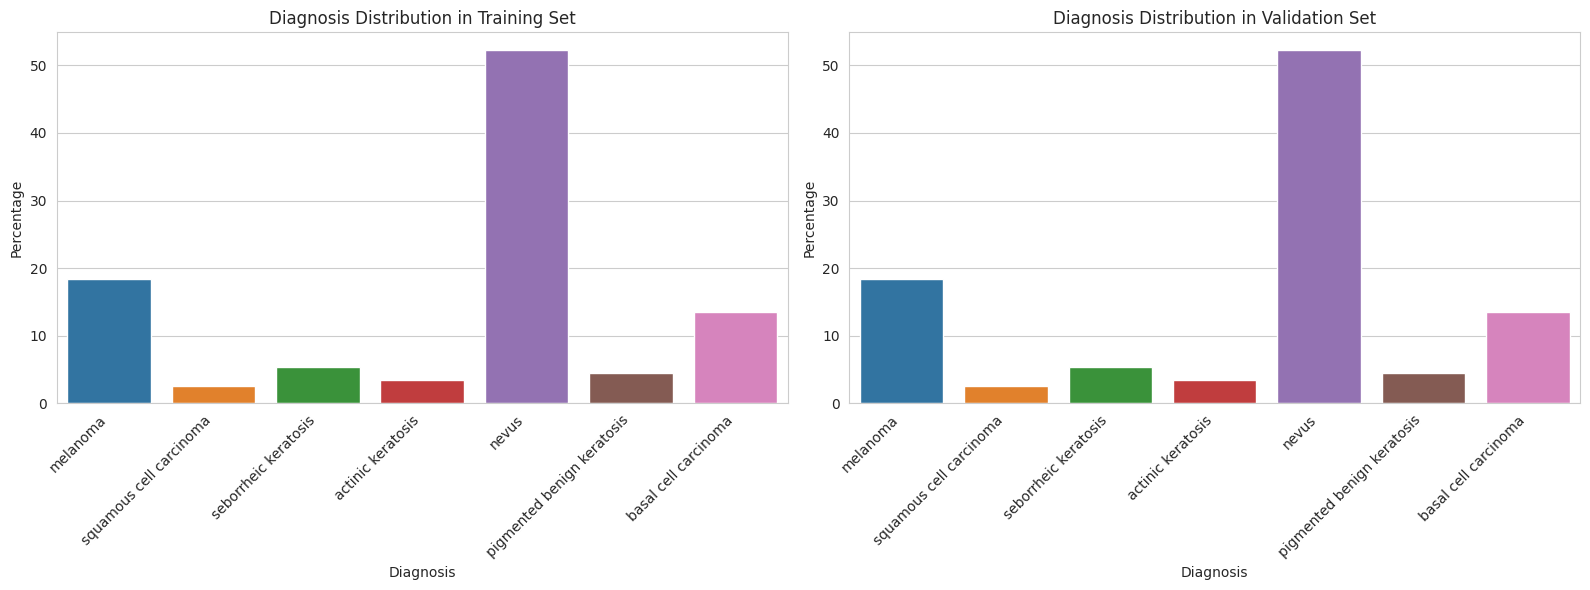

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

processed_data_dir = "dataset2"

def get_diagnosis_distribution(folder_path):
    """
    Menghitung distribusi diagnosis dari gambar di folder yang diberikan.

    Args:
        folder_path: Path ke folder yang berisi subfolder untuk setiap diagnosis.

    Returns:
        Pandas Series: Distribusi diagnosis (persentase).
    """
    diagnosis_counts = {}
    total_images = 0

    for diagnosis in os.listdir(folder_path):
        diagnosis_dir = os.path.join(folder_path, diagnosis)
        if os.path.isdir(diagnosis_dir):
            num_images = len(os.listdir(diagnosis_dir))
            diagnosis_counts[diagnosis] = num_images
            total_images += num_images

    diagnosis_distribution = pd.Series(diagnosis_counts) / total_images * 100
    return diagnosis_distribution

train_distribution = get_diagnosis_distribution(os.path.join(processed_data_dir, "train"))
val_distribution = get_diagnosis_distribution(os.path.join(processed_data_dir, "validation")) 

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=train_distribution.index, y=train_distribution.values)
plt.title('Diagnosis Distribution in Training Set')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=val_distribution.index, y=val_distribution.values)
plt.title('Diagnosis Distribution in Validation Set')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# melihat jumlah gambar per folder

Class Weights:
squamous cell carcinoma: 39.25099601593625
pigmented benign keratosis: 22.41638225255973
basal cell carcinoma: 7.413092550790068
nevus: 1.9130097087378641
melanoma: 5.446102819237147
seborrheic keratosis: 18.71225071225071
actinic keratosis: 28.391930835734872


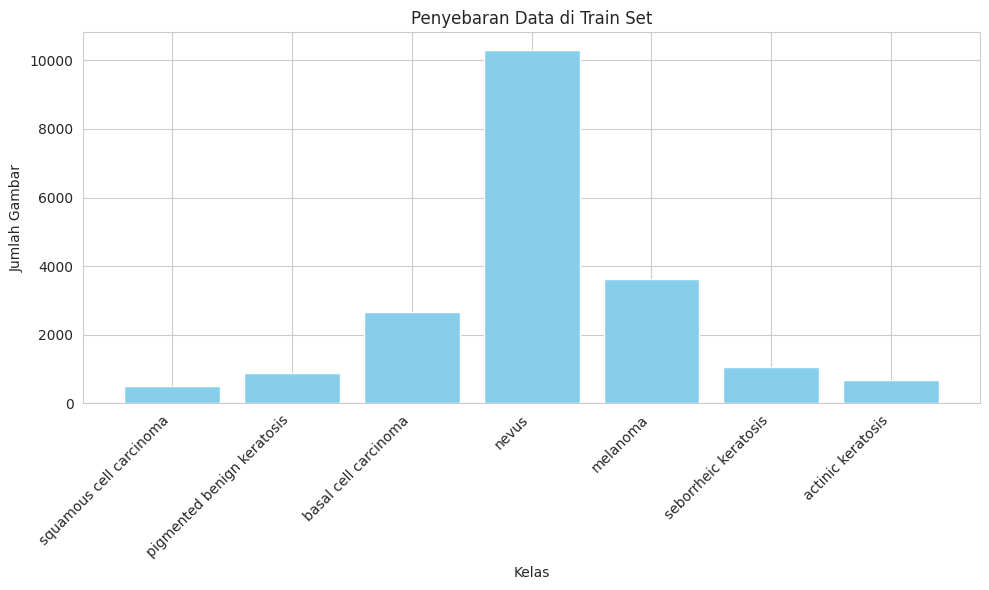

In [ ]:
import matplotlib.pyplot as plt

train_class_counts = {
    'squamous cell carcinoma': 502,
    'pigmented benign keratosis': 879,
    'basal cell carcinoma': 2658,
    'nevus': 10300,
    'melanoma': 3618,
    'seborrheic keratosis': 1053,
    'actinic keratosis': 694,
}

total_data = sum(train_class_counts.values())

class_weights = {class_name: total_data / count for class_name, count in train_class_counts.items()}

print("Class Weights:")
for class_name, weight in class_weights.items():
    print(f"{class_name}: {weight}")

plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Penyebaran Data di Train Set')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.tight_layout()
plt.show()

In [ ]:
import os

def count_images_in_directory(directory):
    """Menghitung jumlah gambar per kelas dalam folder (train/validation)."""
    class_dirs = [os.path.join(directory, label) for label in os.listdir(directory)]
    class_counts = {}

    for label_dir in class_dirs:
        if os.path.isdir(label_dir):
            label = os.path.basename(label_dir)
            num_images = len([img for img in os.listdir(label_dir) if img.endswith('.jpg')])
            class_counts[label] = num_images

    return class_counts

train_class_counts = count_images_in_directory(train_dir)
val_class_counts = count_images_in_directory(val_dir)

print("Distribusi Kelas pada Dataset Train:")
for label, count in train_class_counts.items():
    print(f"{label}: {count} gambar")

print("\nDistribusi Kelas pada Dataset Validation:")
for label, count in val_class_counts.items():
    print(f"{label}: {count} gambar")

Distribusi Kelas pada Dataset Train:
melanoma: 3618 gambar
squamous cell carcinoma: 502 gambar
seborrheic keratosis: 1053 gambar
actinic keratosis: 694 gambar
nevus: 10300 gambar
pigmented benign keratosis: 879 gambar
basal cell carcinoma: 2658 gambar

Distribusi Kelas pada Dataset Validation:
melanoma: 904 gambar
squamous cell carcinoma: 126 gambar
seborrheic keratosis: 263 gambar
actinic keratosis: 173 gambar
nevus: 2575 gambar
pigmented benign keratosis: 220 gambar
basal cell carcinoma: 665 gambar


# Membuat model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


train_dir = './dataset2/train'
val_dir = './dataset2/validation'

train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,
                                  fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x) 
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

Found 19704 images belonging to 7 classes.
Found 4926 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,627,527 (10.02 MB)

 Trainable params: 2,593,415 (9.89 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734018671.220243     116 service.cc:145] XLA service 0x7a3294001eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734018671.220306     116 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/616 ━━━━━━━━━━━━━━━━━━━━ 54s 88ms/step - accuracy: 0.1641 - loss: 2.0582   

I0000 00:00:1734018694.842781     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


616/616 ━━━━━━━━━━━━━━━━━━━━ 438s 632ms/step - accuracy: 0.5716 - loss: 1.2086 - val_accuracy: 0.5436 - val_loss: 2.1413
Epoch 2/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 348s 558ms/step - accuracy: 0.6926 - loss: 0.8717 - val_accuracy: 0.6098 - val_loss: 1.4844
Epoch 3/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 353s 567ms/step - accuracy: 0.7197 - loss: 0.7794 - val_accuracy: 0.6886 - val_loss: 0.9384
Epoch 4/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 354s 569ms/step - accuracy: 0.7492 - loss: 0.7102 - val_accuracy: 0.6920 - val_loss: 0.9298
Epoch 5/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 353s 567ms/step - accuracy: 0.7727 - loss: 0.6370 - val_accuracy: 0.6878 - val_loss: 0.9289
Epoch 6/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 354s 568ms/step - accuracy: 0.7900 - loss: 0.5956 - val_accuracy: 0.7440 - val_loss: 0.7617
Epoch 7/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 361s 580ms/step - accuracy: 0.8037 - loss: 0.5533 - val_accuracy: 0.7146 - val_loss: 0.8893
Epoch 8/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 352s 565ms/step - accuracy: 0.8193 - loss: 0.51

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

model.save("skin_disease_classifier_weighted.h5")

154/154 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.7333 - loss: 0.7781
Validation Loss: 0.7617285251617432
Validation Accuracy: 0.7440113425254822


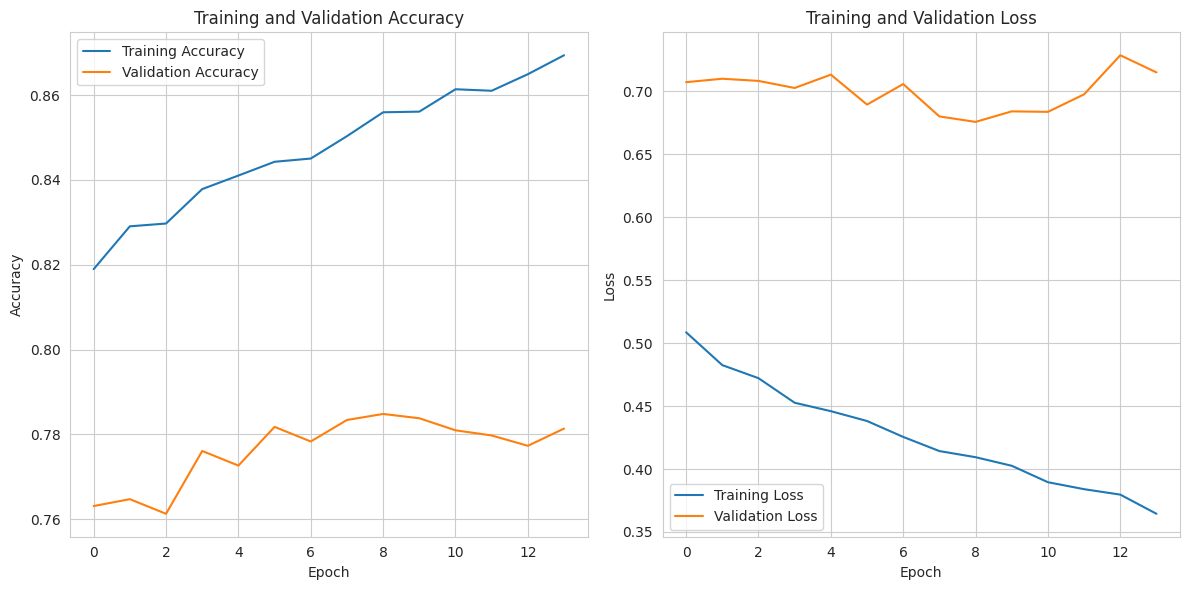

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy dan loss
def plot_training(history):

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history)

 Analisis Kesalahan Model:

Alasan: Memahami jenis kesalahan yang dibuat model dapat memberikan petunjuk berharga tentang area yang perlu diperbaiki.
Cara: Gunakan confusion matrix untuk melihat kelas mana yang sering tertukar oleh model. Ini dapat membantu mengidentifikasi apakah model kesulitan membedakan kelas tertentu, atau apakah ada ketidakseimbangan data yang perlu diatasi.

154/154 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step


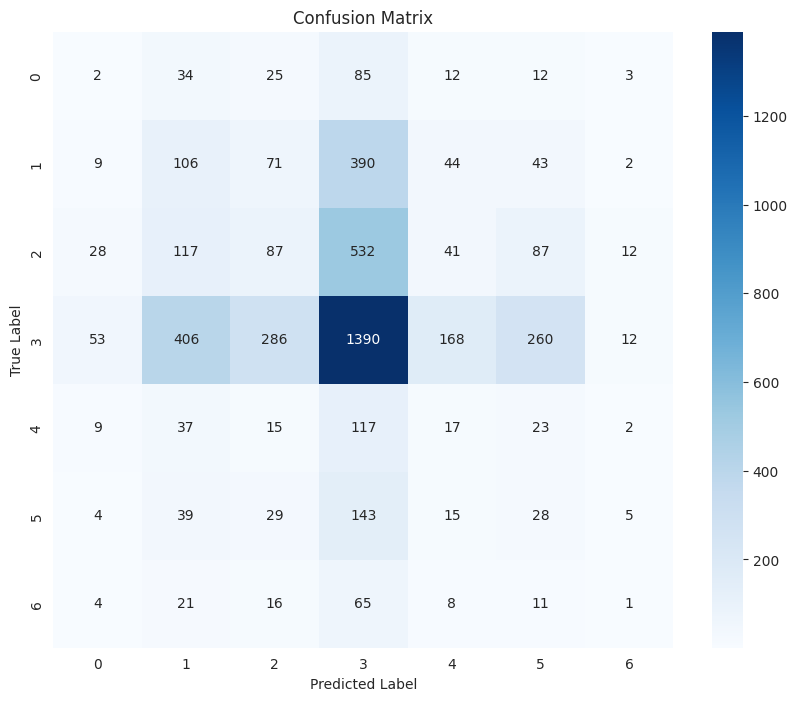

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes 

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

154/154 ━━━━━━━━━━━━━━━━━━━━ 38s 247ms/step


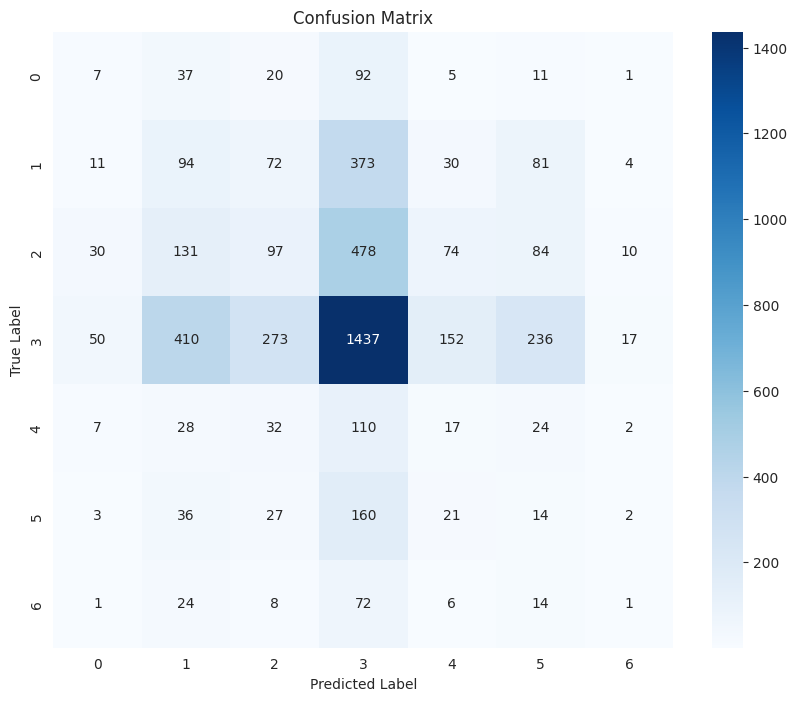

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes 

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
from tensorflow import keras

keras.models.save_model(model, "skin_disease_classifier_weighted.keras")

In [ ]:
# from tensorflow import keras


# try:
#     model = keras.models.load_model("skin_disease_classifier_weighted.keras")
#     print("Loaded saved model from skin_disease_classifier_weighted.keras")
#     initial_epoch = model.history.epoch[-1] + 1 if hasattr(model, 'history') and model.history.epoch else 0
# except OSError: 
#     print("No saved model found. Starting training from scratch.")
#     initial_epoch = 0 

# for layer in model.layers[-20:]:
#     layer.trainable = True

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), 
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(
#     train_generator,
#     epochs=25, 
#     initial_epoch=initial_epoch, 
#     validation_data=val_generator,
#     class_weight=class_weights,
#     callbacks=[early_stopping]
# )

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 166 variables whereas the saved optimizer has 330 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loaded saved model from skin_disease_classifier_weighted.keras
Epoch 1/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 406s 592ms/step - accuracy: 0.8179 - loss: 0.5174 - val_accuracy: 0.7631 - val_loss: 0.7073
Epoch 2/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 349s 562ms/step - accuracy: 0.8289 - loss: 0.4791 - val_accuracy: 0.7647 - val_loss: 0.7101
Epoch 3/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 351s 562ms/step - accuracy: 0.8317 - loss: 0.4711 - val_accuracy: 0.7613 - val_loss: 0.7083
Epoch 4/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 355s 570ms/step - accuracy: 0.8348 - loss: 0.4617 - val_accuracy: 0.7761 - val_loss: 0.7027
Epoch 5/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 348s 558ms/step - accuracy: 0.8414 - loss: 0.4343 - val_accuracy: 0.7726 - val_loss: 0.7133
Epoch 6/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 351s 563ms/step - accuracy: 0.8423 - loss: 0.4449 - val_accuracy: 0.7818 - val_loss: 0.6895
Epoch 7/25
616/616 ━━━━━━━━━━━━━━━━━━━━ 355s 570ms/step - accuracy: 0.8467 - loss: 0.4242 - val_accuracy: 0.7783 - val_loss: 0.7058
Epoch 8/25
61

In [ ]:
# # Evaluasi model
# loss, accuracy = model.evaluate(val_generator)
# print(f"Validation Loss: {loss}")
# print(f"Validation Accuracy: {accuracy}")

154/154 ━━━━━━━━━━━━━━━━━━━━ 38s 244ms/step - accuracy: 0.7818 - loss: 0.6850
Validation Loss: 0.6757619380950928
Validation Accuracy: 0.78481525182724


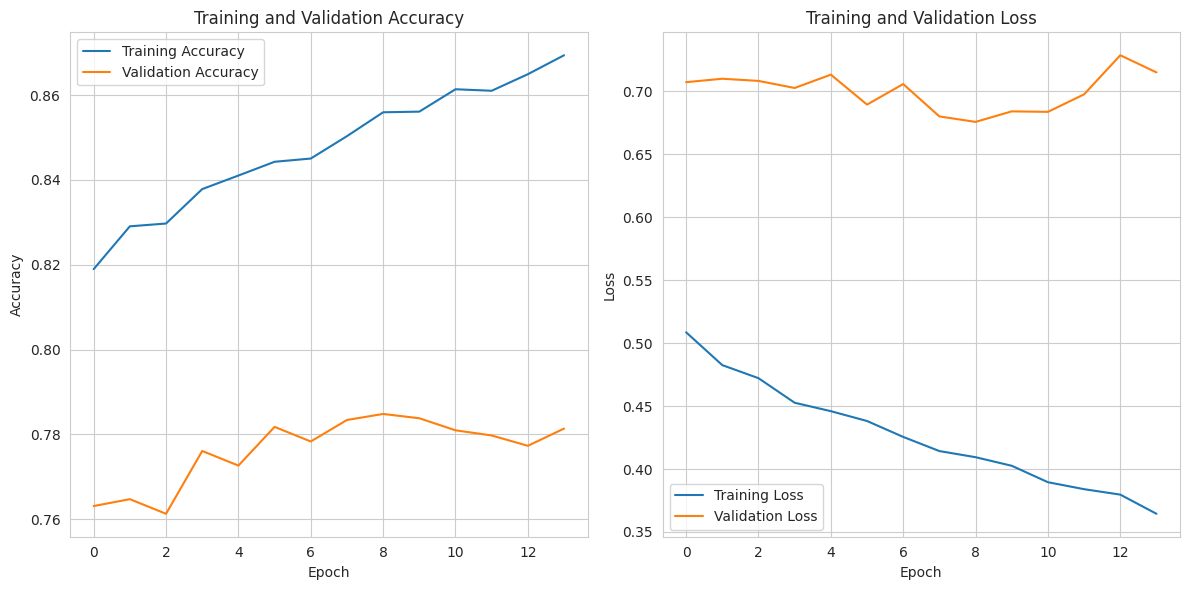

In [ ]:
# import matplotlib.pyplot as plt

# # Plotting accuracy dan loss
# def plot_training(history):
#     # Accuracy
#     plt.figure(figsize=(12, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Training and Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Loss
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# plot_training(history)


In [ ]:
# from tensorflow import keras

# keras.models.save_model(model, "update2_skin_disease_classifier_weighted.keras")